This notebook is for tessting FISSA's class usage

In [1]:
# Plotting toolbox
import holoviews as hv
%load_ext holoviews.ipython

# FISSA toolbox imports
import fissa.core as fissa

/home/swk/.virtualenvs/main/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# set autoreload of libraries
%load_ext autoreload
%autoreload 2

Set basic input data

In [3]:
rois = ['/home/swk/Code/rochefort-lab/fissa/exampleData/RoiSet0529miniTrial1.zip']
images = '/home/swk/Code/rochefort-lab/fissa/exampleData/20150529_mini'
experiment = fissa.Experiment(images,rois)

Apply FISSA algorithm

In [4]:
experiment.separate()

Doing region growing and data extraction....
Doing signal separation for trial....
NMF converged after 1212 iterations.
NMF converged after 1199 iterations.
NMF converged after 1079 iterations.
NMF converged after 1209 iterations.


/home/swk/Code/rochefort-lab/fissa/fissa/ROI.py:145: UserWarning: Polygon initialized without z-coordinate. Assigning to zeroth plane (z = 0)
  'Assigning to zeroth plane (z = 0)')


Find extracted and separated data

:Curve   [x]   (y)
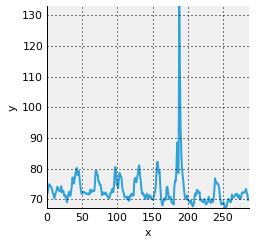

In [9]:
cell = 1
trial = 1
trace = experiment.raw[cell,trial][0,:]
hv.Curve(trace)

All traces

In [5]:
matrices = {(cell,trial):hv.Curve(experiment.raw[cell,trial][0,:])*hv.Curve(experiment.matched[cell,trial][0,:]) for cell in range(4) for trial in range(3)}

:HoloMap   [cell,trial]
   :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
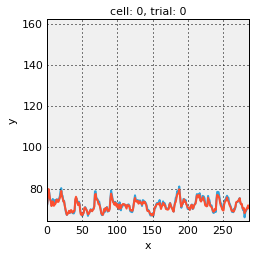
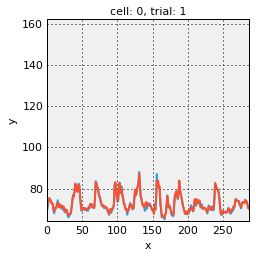
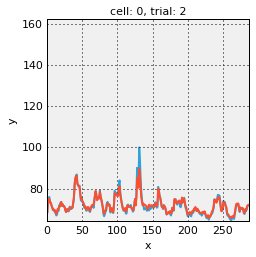
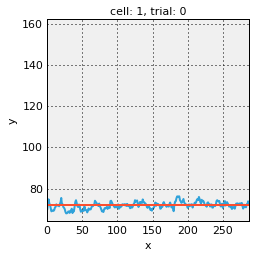
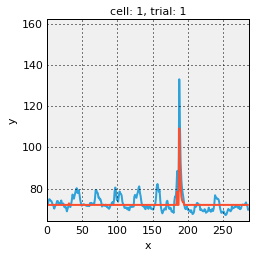
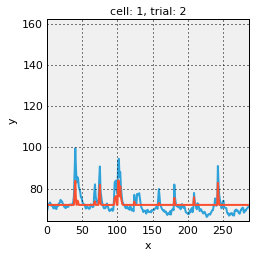
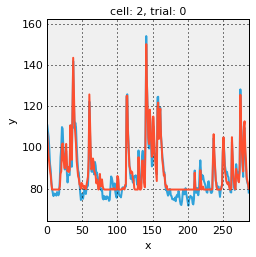
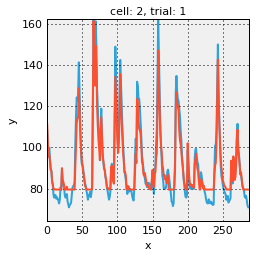
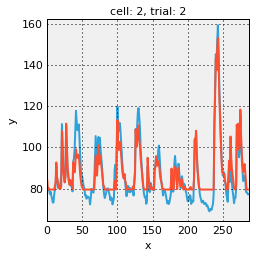
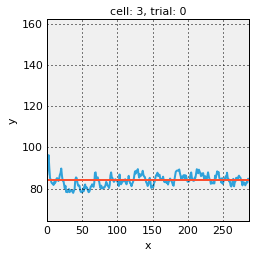
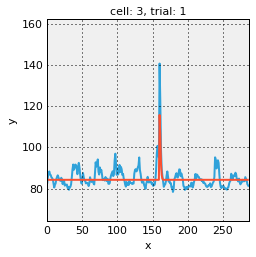
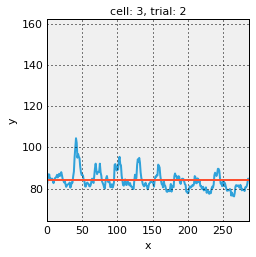

In [6]:
hv.HoloMap(matrices,kdims=['cell','trial'])